In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) 
y_train = np.array([0, 0, 0, 1, 1, 1]) 

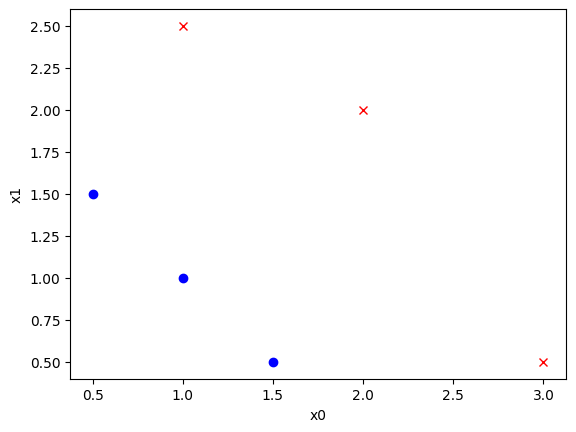

In [38]:
class_0=X_train[y_train==0]
class_1=X_train[y_train==1]

plt.plot(class_0[:,0],class_0[:,1],'o',c='b')
plt.plot(class_1[:,0],class_1[:,1],'x',c='r')
plt.ylabel("x1")
plt.xlabel("x0")
plt.show()

In [39]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [40]:
def f(w,x,b):
    return sigmoid(np.dot(w,x)+b)

In [41]:
def J(w,b,x,y):
    cost=0.0
    m,n=x.shape
    for i in range(m):
        f_wb=f(w,x[i],b)
        cost+=(y[i]*np.log(f_wb))+((1-y[i])*np.log(1-f_wb))
    return -cost/m

In [71]:
def compute_gradient(w,b,x,y):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        f_wb=f(w,x[i],b)
        for j in range(n):
            dj_dw[j]+=(f_wb-y[i])*x[i,j]
        dj_db+=(f_wb-y[i])
    return dj_dw/m,dj_db/m

In [72]:
def gradient_descent(w,b,x,y,alpha=0.01,itmax=10000):
    m,n=x.shape
    while(itmax):
        dj_dw,dj_db=compute_gradient(w,b,x,y)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        itmax-=1
    return w,b

In [73]:
m,n=X_train.shape
w=np.zeros(n)
b=-2
w_up,b_up=gradient_descent(w,b,X_train,y_train)
points=[f(w_up,X_train[i],b_up) for i in range(m)]
line=[np.dot(w_up,X_train[i])+b_up for i in range(m)]

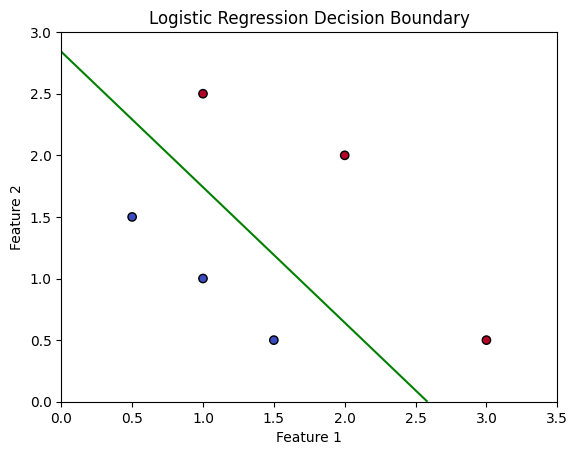

In [75]:
# Plotting
x0_vals = np.linspace(0, 3.5, 100)
x1_vals = np.linspace(0, 3, 100)
X0, X1 = np.meshgrid(x0_vals, x1_vals)
Z = sigmoid(w_up[0] * X0 + w_up[1] * X1 + b_up)

plt.contour(X0, X1, Z, levels=[0.5], colors='green')  # Decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')  # Data points

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()